In [1]:
#SMOTE (Synthetic Minority Oversampling Technique)
# #!pip install -U imbalanced-learn
# import imblearn

In [2]:
# # Generate and plot a synthetic imbalanced classification dataset
# from collections import Counter
# from sklearn.datasets import make_classification
# from matplotlib import pyplot
# from numpy import where

# # define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#                            n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# # summarize class distribution
# counter = Counter(y)
# print(counter)

# # scatter plot of examples by class label
# for label, _ in counter.items():
#     row_ix = where(y == label)[0]
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# pyplot.legend()
# pyplot.show()

In [3]:
#The SMOTE class acts like a data transform object from scikit-learn in that it must be 
#defined and configured, fit on a dataset, then applied to create a new transformed version of 
#the dataset.

#For example, we can define a SMOTE instance with default parameters that will balance the 
#minority class and then fit and apply it in one step to create a transformed version of our 
# #dataset.

# from imblearn.over_sampling import SMOTE

# # transform the dataset
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

# # summarize the new class distribution
# counter = Counter(y)
# print(counter)

# # scatter plot of examples by class label
# for label, _ in counter.items():
#     row_ix = where(y == label)[0]
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# pyplot.legend()
# pyplot.show()

# #Note: many more examples for the minority class on lines between the original examples 
# #in the minority class

In [4]:
# # create/define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#                            n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# # summarize class distribution
# counter = Counter(y)
# print(counter)

# #1)Oversample minority to have 10% of majority (1000)
# #2)Undersample majority to have 50% more than minority (2000)
# from imblearn.under_sampling import RandomUnderSampler
# # define pipeline
# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)

# #Chain two transforms into a Pipeline. Pipeline is applied to dataset performing each transformation
# #in turn and returning final dataset with accumulation of transoform applied to it 
# #(i.e. oversampling followed by undersampling)
# from imblearn.pipeline import Pipeline
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)

# #The pipeline can then be fit and applied to our dataset just like a single transform:
# # transform the dataset
# X, y = pipeline.fit_resample(X, y)

# # summarize the new class distribution
# counter = Counter(y)
# print(counter)
# # scatter plot of examples by class label
# for label, _ in counter.items():
#     row_ix = where(y == label)[0]
#     pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
# pyplot.legend()
# pyplot.show()

#Plot shows 1:2 ratio: undersampled majority class and oversampled minority class


In [5]:
#SMOTE for Classification

#WITHOUT SMOT
#1) Use binary classification dataset, fit & evaluate decision tree algorithm
#2) Algorithm is defined with default hyperparameters
#3) Use repeated stratified k-fold cross-validation to evaluate the model: We will use three 
#repeats of 10-fold cross-validation, meaning that 10-fold cross-validation is applied three 
#times fitting and evaluating 30 models on the dataset.
#4) Dataset is stratified: each fold of the cross-validation split will have the same 
#class distribution as the original dataset, in this case, a 1:100 ratio
#5) Evaluate using ROC area under curve (AUC) metric. 

# # decision tree evaluated on imbalanced dataset
# from numpy import mean
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier

# # define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#                            n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# # define model
# model = DecisionTreeClassifier()

# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# #Once fit, we can calculate and report the mean of the scores across the folds and repeats.
# print('Mean ROC AUC: %.3f' % mean(scores))

In [6]:
#Same WITH SMOTE-transformed version of dataset
#1) apply method to training dataset only
# #2) evaluate the model on the stratified but non-transformed test set

# # decision tree evaluated on imbalanced dataset with SMOTE oversampling
# from numpy import mean
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE

# # define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#                            n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# # define pipeline that first transforms the training dataset with SMOTE then fits the model
# steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
# pipeline = Pipeline(steps=steps)

# # evaluate pipeline using repeated k-fold cross-validation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))



In [7]:
#Same with SMOTE & random undersampling of majority class

# from numpy import mean
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# # define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#                            n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# # define pipeline
# model = DecisionTreeClassifier()

# #oversample the minority class with SMOTE to about a 1:10 ratio
# over = SMOTE(sampling_strategy=0.1)

# #undersample the majority class to achieve about a 1:2 ratio
# under = RandomUnderSampler(sampling_strategy=0.5)
# #You could explore testing different ratios of the minority class and majority class 
# #(e.g. changing the sampling_strategy argument) to see if a further lift in performance is 
# #possible.

# steps = [('over', over), ('under', under), ('model', model)]
# pipeline = Pipeline(steps=steps)

# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [8]:
#test different values of the k-nearest neighbors selected in the SMOTE procedure when each 
#new synthetic example is created
#grid search a range of values of k, such as values from 1 to 7, and evaluate the pipeline for each value.

# # define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#                            n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# # values to evaluate
# k_values = [1, 2, 3, 4, 5, 6, 7]
# for k in k_values:
    
#     # define pipeline
#     model = DecisionTreeClassifier()
#     #SMOTE oversampling with different k values for the KNN used in the procedure
#     over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
#     #random undersampling and fitting a decision tree on the resulting training dataset
#     under = RandomUnderSampler(sampling_strategy=0.5)
#     steps = [('over', over), ('under', under), ('model', model)]
#     pipeline = Pipeline(steps=steps)
    
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('> k=%d, Mean ROC AUC: %.3f' % (k, score))
    
# This highlights that both the amount of oversampling and undersampling performed 
# (sampling_strategy argument) and the number of examples selected from which a partner is 
# chosen to create a synthetic example (k_neighbors) may be important parameters to select and 
# tune for your dataset.

## Useful code starts here:

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

In [10]:
file_df = pd.read_csv("Resources/loanData.csv")
file_df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import roc_auc_score,recall_score,mean_squared_error ,classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [12]:
import warnings
import sklearn
import pandas as pd

In [13]:
# from numpy import mean
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter

In [14]:
file_df.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0,1508,0,2358,0
LoanAmount,NaN,128,66,120,141
Loan_Amount_Term,360,360,360,360,360


In [15]:
file_df1 = file_df.drop(labels=["Loan_ID"],axis=1)

In [16]:
file_df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
yes_df = file_df1[file_df1["Loan_Status"] =='Y']

In [18]:
no_df = file_df1[file_df1["Loan_Status"] !='Y']

In [19]:
len(yes_df) , len(no_df)

(422, 192)

In [20]:
final_df = pd.concat([no_df ,yes_df.sample(n=len(no_df)) ],ignore_index=True,copy=True)

In [21]:
len(final_df)

384

In [22]:
final_df["Loan_Status"].value_counts()

Y    192
N    192
Name: Loan_Status, dtype: int64

In [23]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [24]:
# #Counter
# counter = Counter(y)
# counter

In [25]:
# approval = file_df1[file_df1['Loan_Status'] == 'Y']
# denial = file_df1[file_df1['Loan_Status'] == 'N']
# print (approval.shape, denial.shape)

In [26]:
# from imblearn.combine import SMOTETomek
# from imblearn.under_sampling import NearMiss

# smk = SMOTETomek(random_state=42)
# X_res, y_res = smk.fit_sample(X,Y)

# X_res.shape, y_res.shape

In [27]:
#Categorical variables
cat_col = X.select_dtypes(include="object").columns.to_list()
cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [28]:
#Numerical variables
num_col = X.select_dtypes(exclude="object").columns.to_list()
num_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [29]:
# # #Resampling before split - Does not work bc values have to be one hot encoded
# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# X, y = pipeline.fit_resample(X, y)

In [30]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42)

In [31]:
#Logistic Regression (tried not used in finale model)
lg = LogisticRegression( max_iter= 400 ,n_jobs= -1 ,l1_ratio= .2)

In [32]:
lg = GradientBoostingClassifier(n_estimators=4000,learning_rate=0.05,
#                                 max_depth=6,
                               validation_fraction=0.2,
                               n_iter_no_change=10, tol=0.01,
                               random_state=42)

In [33]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, cat_col),
     ('num', numerical_pipe, num_col)]
    )


rf = Pipeline([
    ('preprocess', preprocessing),
    ('feature_selection', SelectFromModel(lg, prefit=False)),
    ('classifier', lg)
])


In [34]:
# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# X_train, y_train = pipeline.fit_resample(X_train, y_train) #X and y train are not one hot encoded

In [35]:
#Fit the model
rf.fit(X_train,y_train);

In [36]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))


RF train accuracy: 0.781
RF test accuracy: 0.729


In [37]:
#Incorrect
# print("R2" % rf.f1_score(X_test, y_test))

In [38]:
y_pred = rf.predict(X_test)

In [39]:
# ### Cannot plot categorical data
# predictions = rf.predict(X_test)
# #model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(rf.predict(X_train), rf.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(rf.predict(X_test), rf.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# #plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")


# # calculate roc curve
# # fpr, tpr, thresholds = roc_curve(testy, pos_probs)

# # # calculate roc curve
# # fpr, tpr, thresholds = roc_curve(testy, pos_probs)

# plt.show()

In [40]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.75      0.69      0.72        48
           Y       0.71      0.77      0.74        48

    accuracy                           0.73        96
   macro avg       0.73      0.73      0.73        96
weighted avg       0.73      0.73      0.73        96



In [41]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [42]:
name_arr = np.array(get_feature_names(rf.steps[0][1]))

/Users/medinai/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
/Users/medinai/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available


In [43]:
# name_arr

In [44]:
# coef = rf.steps[1][1].estimator_.coef_
# coef[0].shape

/Users/medinai/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
/Users/medinai/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
/Users/medinai/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


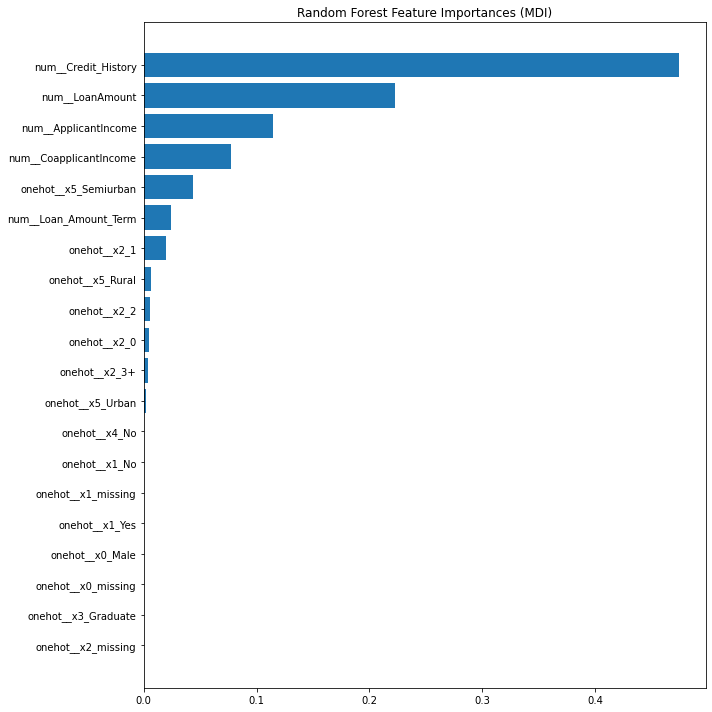

In [45]:
y_ticks = np.arange(0, 20)
sorted_idx = rf.steps[1][1].estimator_.feature_importances_.argsort()
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(np.array(get_feature_names(rf.steps[0][1]))[sorted_idx][-20:], rf.steps[1][1].estimator_.feature_importances_[sorted_idx][-20:])
ax.set_yticklabels(np.array(get_feature_names(rf.steps[0][1]))[sorted_idx][-20:])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

In [46]:
X_train.iloc[1,:].to_dict()

{'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '2',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 3159,
 'CoapplicantIncome': 461.0,
 'LoanAmount': 108.0,
 'Loan_Amount_Term': 84.0,
 'Credit_History': 1.0,
 'Property_Area': 'Urban'}

In [47]:
pd.DataFrame.from_dict({'Gender': ['Male'],
 'Married': ['Yes'],
 'Dependents': ['2'],
 'Education': ['Graduate'],
 'Self_Employed': ['No'],
 'ApplicantIncome': [3100],
 'CoapplicantIncome': [1400.0],
 'LoanAmount': [113.0],
 'Loan_Amount_Term': [360.0],
 'Credit_History': [1.0],
 'Property_Area': 'Urban'})

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,2,Graduate,No,3100,1400.0,113.0,360.0,1.0,Urban


In [48]:
rf.predict(pd.DataFrame.from_dict({'Gender': ['Male'],
 'Married': ['Yes'],
 'Dependents': ['0'],
 'Education': ['Graduate'],
 'Self_Employed': ['No'],
 'ApplicantIncome': [3100],
 'CoapplicantIncome': [14000.0],
 'LoanAmount': [113.0],
 'Loan_Amount_Term': [360.0],
 'Credit_History': [1.0],
 'Property_Area': ['Urban']}))[0]

'Y'

- post requist from the front end and the body will be json object 

```
{'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '2',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 3100,
 'CoapplicantIncome': 1400.0,
 'LoanAmount': 113.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Urban'}
```

- on the backend in the flask app 

```
{Gender,
 Married,
 Dependents,
 Education,
 Self_Employed,
 ApplicantIncome,
 CoapplicantIncome,
 LoanAmount,
 Loan_Amount_Term,
 Credit_History,
 Property_Area}= requist.body
```

- usr the model like this 

```
rf.predict(pd.DataFrame.from_dict({'Gender': [Gender],
 'Married': [Married],
 'Dependents': [Dependents],
 'Education': ['Graduate'],
 'Self_Employed': ['No'],
 'ApplicantIncome': [3100],
 'CoapplicantIncome': [1400.0],
 'LoanAmount': [113.0],
 'Loan_Amount_Term': [360.0],
 'Credit_History': [1.0],
 'Property_Area': ['Urban']}))[0]
 ```

In [49]:
#Saving model with joblib
# save the model to disk
import joblib
filename = 'balanced_model.sav'
joblib.dump(rf, filename)
 
#load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)


0.7291666666666666


In [50]:
# Saving model with pickle
import pickle

# save the model to disk
filename_pickle = 'balanced_model_pickle.sav'
pickle.dump(rf, open(filename_pickle, 'wb'))

# load the model from disk
loaded_model_pickle = pickle.load(open(filename_pickle, 'rb'))
result_pickle = loaded_model_pickle.score(X_test, y_test)
print(result_pickle)


0.7291666666666666
